In [70]:
import pandas as pd
from collections import Counter   
raw_total=pd.read_excel('country/vietnam.xlsx')
tags_total=[]
for tags in raw_total['tags']:
    tags=tags[2:-2]
    tags_list=tags.split("', '")  
    for tag in tags_list:
        if tag=='':
            continue
        tags_total.append(tag)

STOPWORD=['#베트남여행','#베트남맛집','#베트남','#여행스타그램','#소통','#맛스타그램','#먹스타그램']
import re
p=re.compile('#[^가-힣]+')
tags_total_selected=[]
for tag in tags_total:
    m=p.match(tag)
    if tag not in STOPWORD:
        if m==None:
            tags_total_selected.append(tag)
tag_counts_selected=Counter(tags_total_selected)
tag_counts_selected.most_common(50)

[('#나트랑', 67),
 ('#베트남음식', 49),
 ('#호치민', 47),
 ('#맛집', 44),
 ('#다낭', 40),
 ('#푸꾸옥', 37),
 ('#여행', 33),
 ('#해외여행', 30),
 ('#쌀국수', 30),
 ('#호치민맛집', 28),
 ('#나트랑여행', 26),
 ('#베트남커피', 24),
 ('#다낭여행', 23),
 ('#하노이', 23),
 ('#쌀국수맛집', 23),
 ('#일상', 21),
 ('#호치민여행', 21),
 ('#호치민일상', 20),
 ('#나트랑스냅', 20),
 ('#맞팔', 19),
 ('#베트남쌀국수', 19),
 ('#반미', 19),
 ('#푸꾸옥여행', 18),
 ('#호이안', 18),
 ('#동남아여행', 17),
 ('#가족여행', 17),
 ('#하노이여행', 17),
 ('#호치민라이프', 16),
 ('#나트랑맛집', 16),
 ('#물놀이', 16),
 ('#분짜', 16),
 ('#다낭맛집', 16),
 ('#맛집추천', 16),
 ('#베트남맥주', 16),
 ('#나짱', 15),
 ('#하노이맛집', 15),
 ('#카페', 15),
 ('#핫플', 15),
 ('#데이트', 15),
 ('#나트랑망고네일', 14),
 ('#먹팔', 14),
 ('#베트남스냅', 14),
 ('#반미샌드위치', 14),
 ('#범죄도시2', 14),
 ('#문래동맛집', 14),
 ('#반미362', 14),
 ('#핫플레이스', 14),
 ('#문래', 14),
 ('#샌드위치', 14),
 ('#문래역', 14)]

In [ ]:
tag_counts_selected

In [83]:
wordfre=tag_counts_selected.most_common()

In [84]:
df=pd.DataFrame(wordfre,columns=['tag','counts'])
df.to_excel('country/frequency/vietnam.xlsx',index=False)

In [37]:
import matplotlib.pylab as plt
from wordcloud import WordCloud
import platform
if platform.system()=='Windows':
    font_path='c:/Windows/Fonts/malgun.ttf'

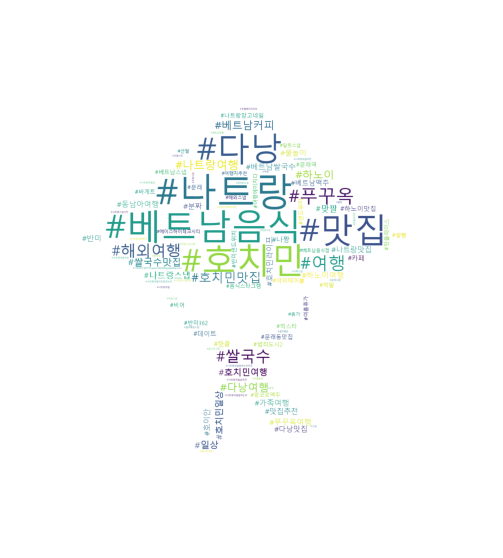

In [81]:
from PIL import Image
import numpy as np
viet=Image.open('vietnam_hat.jpg')
hat=np.array(viet)
wordcloud=WordCloud(font_path=font_path,
                    background_color='white',
                    max_words=100,
                    mask =hat,
                    relative_scaling=0.3,
                    width=800,
                    height=400).generate_from_frequencies(tag_counts_selected)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country/vietnam.png')